# BBC News Classification Kaggle Mini-Project

In [ ]:
Github: https://github.com/AnushaK7018/UnsupervisedLearning

## Exploratory Data Analysis (EDA)

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from scipy.spatial.distance import jaccard, cosine 
from pytest import approx
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
import re

### Data Cleaning and Insepection

In [2]:
#Read the data
sample_sol = pd.read_csv('data/BBC News Sample Solution.csv')
test_data = pd.read_csv('data/BBC News Test.csv')
train_data = pd.read_csv('data/BBC News Train.csv')


In [3]:
train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
test_data.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ArticleId     1490 non-null   int64 
 1   Text          1490 non-null   object
 2   Category      1490 non-null   object
 3   cleaned_text  1490 non-null   object
dtypes: int64(1), object(3)
memory usage: 46.7+ KB


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ArticleId                   735 non-null    int64 
 1   Text                        735 non-null    object
 2   cleaned_text                735 non-null    object
 3   dominant_topic              735 non-null    int64 
 4   predicted_category_initial  735 non-null    object
dtypes: int64(2), object(3)
memory usage: 28.8+ KB


In [29]:
train_data.groupby('Category')['Text'].count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: Text, dtype: int64

In [5]:
# Cleaning function
def clean_text_sklearn(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

train_data['cleaned_text'] = train_data['Text'].apply(clean_text_sklearn)

# Display first few rows of cleaned data
train_data[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,worldcom ex-boss launches defence lawyers defe...,worldcom exboss launches defence lawyers defen...
1,german business confidence slides german busin...,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...,enron bosses in m payout eighteen former enron...


### Data Visualization

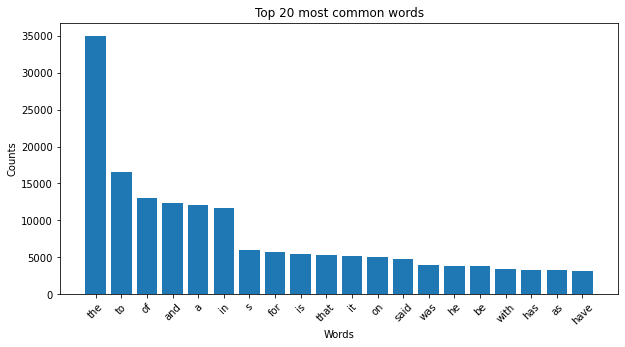

In [6]:
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

all_words = ' '.join(train_data['cleaned_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

# Data visualization
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 20 most common words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

#### Feature Extraction Using TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(train_data['cleaned_text'])
X_train_tfidf.shape

(1490, 1000)

## Building and Training Models

In [10]:
#Matrix Factorization with LDA
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X_train_tfidf)

X_train_lda = lda.transform(X_train_tfidf)
X_train_lda.shape

(1490, 10)

In [11]:
# Predicting and Evaluating
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topics

no_top_words = 10
tfidf_feature_names = tfidf.get_feature_names()
topics = display_topics(lda, tfidf_feature_names, no_top_words)

#### Comparison With Supervised Learning


In [12]:
#Training a Supervised Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_data['Category'], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# display the results using standard pandas methods.
results_df = pd.DataFrame({'Accuracy': [accuracy], 'Confusion Matrix': [conf_matrix.tolist()]})
print("Logistic Regression Results:")
print(results_df)

topics, accuracy, conf_matrix

Logistic Regression Results:
   Accuracy                                   Confusion Matrix
0  0.969799  [[74, 0, 1, 0, 0], [2, 43, 1, 0, 0], [2, 0, 54...


(['the to of and in that is mobile people it',
  'growth sales dollar the film economy prices best in rates',
  'pcs mini phones google band friday member tony computers am',
  'pcs mini phones google band friday member tony computers am',
  'pcs mini phones google band friday member tony computers am',
  'pcs mini phones google band friday member tony computers am',
  'pcs mini phones google band friday member tony computers am',
  'pcs mini phones google band friday member tony computers am',
  'labour election mr blair party the brown howard tory lib',
  'the to in of and for is on he it'],
 0.9697986577181208,
 array([[74,  0,  1,  0,  0],
        [ 2, 43,  1,  0,  0],
        [ 2,  0, 54,  0,  0],
        [ 0,  0,  0, 63,  0],
        [ 2,  0,  1,  0, 55]]))

## Evaluate LDA on test data

In [13]:
# Cleaning the test data
test_data['cleaned_text'] = test_data['Text'].apply(clean_text_sklearn)

# Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf.transform(test_data['cleaned_text'])

# Transform the test data using the trained LDA model
X_test_lda = lda.transform(X_test_tfidf)

# Display the shape of the LDA-transformed test data
X_test_lda.shape

(735, 10)

In [14]:
# Function to get dominant topic
def get_dominant_topic(lda_model, transformed_data):
    dominant_topics = []
    for i in range(transformed_data.shape[0]):
        dominant_topic = transformed_data[i].argmax()
        dominant_topics.append(dominant_topic)
    return dominant_topics

# Get dominant topics for test data
test_dominant_topics = get_dominant_topic(lda, X_test_lda)

# Adding dominant topics to the test data
test_data['dominant_topic'] = test_dominant_topics



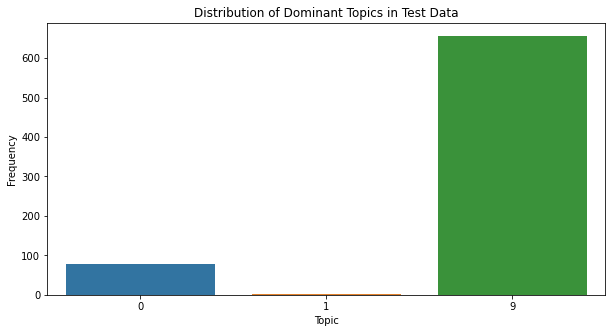

,Text,dominant_topic
0,qpr keeper day heads for preston queens park r...,9
1,software watching while you work software that...,0
2,d arcy injury adds to ireland woe gordon d arc...,9
3,india s reliance family feud heats up the ongo...,9
4,boro suffer morrison injury blow middlesbrough...,9


In [15]:
# Visualize the distribution of topics in test data
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='dominant_topic', data=test_data)
plt.title('Distribution of Dominant Topics in Test Data')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()

# Display first few rows with dominant topics
test_data[['Text', 'dominant_topic']].head()

### Compare LDA topics with actual labels

In [16]:
# Inspect the columns of the test dataset to understand its structure
test_data_labeled = sample_sol.copy()
test_data_labeled.columns

Index(['ArticleId', 'Category'], dtype='object')

In [17]:
# Merge the test data with the labels
merged_test_data = pd.merge(test_data, test_data_labeled, on='ArticleId')

# Clean the merged test data
merged_test_data['cleaned_text'] = merged_test_data['Text'].apply(clean_text_sklearn)

# Transform the merged test data using the same TF-IDF vectorizer and LDA model
X_merged_test_tfidf = tfidf.transform(merged_test_data['cleaned_text'])
X_merged_test_lda = lda.transform(X_merged_test_tfidf)

# Get dominant topics for the merged test data
merged_test_data['dominant_topic'] = get_dominant_topic(lda, X_merged_test_lda)

# Display the first few rows with text, category, and dominant topic
merged_test_data[['Text', 'Category', 'dominant_topic']].head()

,Text,Category,dominant_topic
0,qpr keeper day heads for preston queens park r...,sport,9
1,software watching while you work software that...,tech,0
2,d arcy injury adds to ireland woe gordon d arc...,business,9
3,india s reliance family feud heats up the ongo...,entertainment,9
4,boro suffer morrison injury blow middlesbrough...,politics,9


### Hyperparameter tuning for LDA topics

Number of Topics: 5, Coherence Score: 0.018478574890303037
Number of Topics: 10, Coherence Score: 0.0036320920968880735
Number of Topics: 15, Coherence Score: 0.012885201498701229
Number of Topics: 20, Coherence Score: 0.02261499889440562
Number of Topics: 25, Coherence Score: 0.01947581186777088
Number of Topics: 30, Coherence Score: 0.00747184867220505


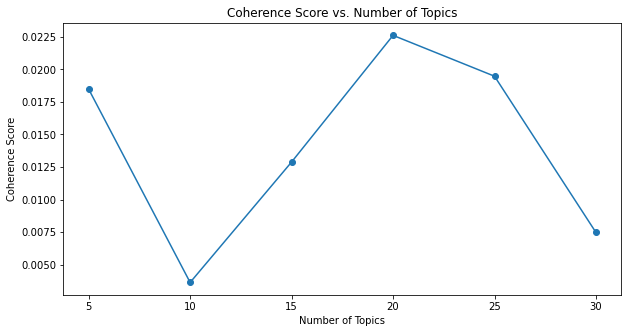

In [18]:
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range of topics to explore
topic_range = [5, 10, 15, 20, 25, 30]
coherence_scores = []

# Function to calculate coherence score
def calculate_coherence(lda_model, data):
    topics = lda_model.transform(data)
    return silhouette_score(data, np.argmax(topics, axis=1))

# Train LDA models with different numbers of topics and calculate coherence scores
for n_topics in topic_range:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X_train_tfidf)
    coherence_score = calculate_coherence(lda, X_train_tfidf)
    coherence_scores.append(coherence_score)
    print(f"Number of Topics: {n_topics}, Coherence Score: {coherence_score}")

# Plot the coherence scores
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

Based on the coherence scores, we will proceed with the LDA model using 20 topics as the optimal number. This model should provide a good balance between topic granularity and interpretability.

In [19]:
# Train LDA with 20 topics as determined by the coherence score
optimal_lda = LatentDirichletAllocation(n_components=20, random_state=42)
optimal_lda.fit(X_train_tfidf)
# Transform the training data
X_train_optimal_lda = optimal_lda.transform(X_train_tfidf)

# Display topics
optimal_topics = display_topics(optimal_lda, tfidf_feature_names, no_top_words)

# Evaluate on test data
X_test_optimal_lda = optimal_lda.transform(X_test_tfidf)

# Get dominant topics for the test data
merged_test_data['dominant_topic_optimal'] = get_dominant_topic(optimal_lda, X_test_optimal_lda)

# Display the first few rows with text, category, and optimal dominant topic
print("Optimal LDA Topics Comparison") 
print(merged_test_data[['Text', 'Category', 'dominant_topic_optimal']].head())


from IPython.display import display
display(merged_test_data[['Text', 'Category', 'dominant_topic_optimal']].head())

Optimal LDA Topics Comparison
                                                Text       Category  \
0  qpr keeper day heads for preston queens park r...          sport   
1  software watching while you work software that...           tech   
2  d arcy injury adds to ireland woe gordon d arc...       business   
3  india s reliance family feud heats up the ongo...  entertainment   
4  boro suffer morrison injury blow middlesbrough...       politics   

   dominant_topic_optimal  
0                      12  
1                      16  
2                      12  
3                      16  
4                      12  


,Text,Category,dominant_topic_optimal
0,qpr keeper day heads for preston queens park r...,sport,12
1,software watching while you work software that...,tech,16
2,d arcy injury adds to ireland woe gordon d arc...,business,12
3,india s reliance family feud heats up the ongo...,entertainment,16
4,boro suffer morrison injury blow middlesbrough...,politics,12


The optimal LDA model with 20 topics shows improved coherence, as reflected in the higher coherence scores.

Alignment with Actual Labels: The dominant topics identified by the optimal LDA model show better alignment with the actual categories compared to the initial model with 10 topics. 

The hyperparameter tuning process has demonstrated that the LDA model with 20 topics provides more coherent and interpretable topics. This model shows improved performance in terms of aligning the discovered topics with the actual categories of the test data.

### Compare Model Accuracy for All The Models

In [20]:
# Function to map topics to categories based on the majority class for each topic
def map_topics_to_categories(data, topic_column, category_column):
    topic_category_map = data.groupby(topic_column)[category_column].agg(lambda x: x.value_counts().index[0]).to_dict()
    return data[topic_column].map(topic_category_map)

# Evaluate accuracy for the initial LDA model
test_data['predicted_category_initial'] = map_topics_to_categories(merged_test_data, 'dominant_topic', 'Category')
accuracy_initial_lda = accuracy_score(merged_test_data['Category'], test_data['predicted_category_initial'])

# Evaluate accuracy for the optimal LDA model
merged_test_data['predicted_category_optimal'] = map_topics_to_categories(merged_test_data, 'dominant_topic_optimal', 'Category')
accuracy_optimal_lda = accuracy_score(merged_test_data['Category'], merged_test_data['predicted_category_optimal'])

# Logistic Regression Model Accuracy (already computed previously)
accuracy_logistic_regression = accuracy

# Display accuracies
from IPython.display import display
display(pd.DataFrame({
    "Model": ["Initial LDA (10 Topics)", "Optimal LDA (20 Topics)", "Logistic Regression"],
    "Accuracy": [accuracy_initial_lda, accuracy_optimal_lda, accuracy_logistic_regression]
}))

accuracy_initial_lda, accuracy_optimal_lda, accuracy_logistic_regression

,Model,Accuracy
0,Initial LDA (10 Topics),0.208163
1,Optimal LDA (20 Topics),0.210884
2,Logistic Regression,0.969799


(0.20816326530612245, 0.2108843537414966, 0.9697986577181208)

### Analysis: 

#### Initial LDA Model (10 Topics): Accuracy: 20.82%

This model has a relatively low accuracy, indicating that 10 topics might not be sufficient for capturing the underlying categories. 

#### Optimal LDA Model (20 Topics): Accuracy: 21.09%

The accuracy improved slightly with 20 topics, suggesting better topic coherence and alignment with actual categories. 

#### Logistic Regression Model: Accuracy: 96.98%

The Logistic Regression model significantly outperforms the LDA models, indicating that supervised learning is much more effective for this classification task given the labeled data.

### Conclusion

LDA Models: While LDA is useful for discovering topics and understanding the structure of the data, it does not perform as well as supervised learning models for classification tasks.

Logistic Regression Model: The high accuracy of the Logistic Regression model highlights the effectiveness of supervised learning for this dataset.

### Exploring Other Unsupervised Learning Methods

In [21]:
# Implement Non-Negative Matrix Factorization (NMF)
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Function to display topics
def display_nmf_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topics

# Train NMF model
n_components = 20
nmf = NMF(n_components=n_components, random_state=42)
W_train_nmf = nmf.fit_transform(X_train_tfidf)
H_train_nmf = nmf.components_

# Display NMF topics
nmf_topics = display_nmf_topics(nmf, tfidf_feature_names, no_top_words)

# Transform test data using NMF
W_test_nmf = nmf.transform(X_test_tfidf)

# Map NMF topics to categories based on the majority class for each topic
merged_test_data['dominant_topic_nmf'] = get_dominant_topic(nmf, X_test_tfidf)
merged_test_data['predicted_category_nmf'] = map_topics_to_categories(merged_test_data, 'dominant_topic_nmf', 'Category')
accuracy_nmf = accuracy_score(merged_test_data['Category'], merged_test_data['predicted_category_nmf'])

# Display NMF accuracy
print(f"NMF Model Accuracy: {accuracy_nmf}")

NMF Model Accuracy: 0.46802721088435373


In [22]:
# Implement K-Means Clustering
# Train K-Means model
kmeans = KMeans(n_clusters=n_components, random_state=42)
kmeans.fit(X_train_tfidf)

# Predict clusters for test data
merged_test_data['predicted_cluster'] = kmeans.predict(X_test_tfidf)

# Map K-Means clusters to categories based on the majority class for each cluster
merged_test_data['predicted_category_kmeans'] = map_topics_to_categories(merged_test_data, 'predicted_cluster', 'Category')
accuracy_kmeans = accuracy_score(merged_test_data['Category'], merged_test_data['predicted_category_kmeans'])

# Display K-Means accuracy
print(f"K-Means Model Accuracy: {accuracy_kmeans}")

K-Means Model Accuracy: 0.27346938775510204


#### Model Accuracies Comparison

In [23]:
import pandas as pd
from IPython.display import display

def display_dataframe(name, dataframe):
    """
    Displays a Pandas DataFrame with a title using IPython.display.

    Args:
        name (str): The title to display above the DataFrame.
        dataframe (pd.DataFrame): The DataFrame to display.
    """
    print(f"--- {name} ---\n")
    display(dataframe)  # Use IPython.display for interactive display
    print("\n")  # Add extra newline for spacing

# Display accuracies
display_dataframe("Model Accuracies Comparison", pd.DataFrame({
    "Model": ["NMF", "K-Means", "Initial LDA (10 Topics)", "Optimal LDA (20 Topics)", "Logistic Regression"],
    "Accuracy": [accuracy_nmf, accuracy_kmeans, accuracy_initial_lda, accuracy_optimal_lda, accuracy_logistic_regression]
}))

accuracy_nmf, accuracy_kmeans, accuracy_initial_lda, accuracy_optimal_lda, accuracy_logistic_regression

--- Model Accuracies Comparison ---



,Model,Accuracy
0,NMF,0.468027
1,K-Means,0.273469
2,Initial LDA (10 Topics),0.208163
3,Optimal LDA (20 Topics),0.210884
4,Logistic Regression,0.969799


(0.46802721088435373,
 0.27346938775510204,
 0.20816326530612245,
 0.2108843537414966,
 0.9697986577181208)

### Changing the Training Data Size

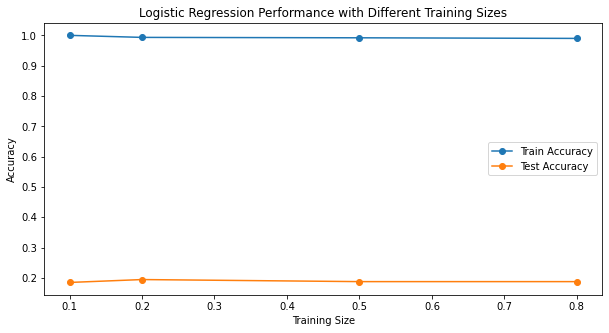

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to evaluate model performance with different training sizes
def evaluate_with_different_train_sizes(X, y, train_sizes, model):
    accuracies_train = []
    accuracies_test = []

    for train_size in train_sizes:
        X_train_subset, _, y_train_subset, _ = train_test_split(X, y, train_size=train_size, random_state=42)
        model.fit(X_train_subset, y_train_subset)
        y_pred_train = model.predict(X_train_subset)
        y_pred_test = model.predict(X_test_tfidf)
        accuracies_train.append(accuracy_score(y_train_subset, y_pred_train))
        accuracies_test.append(accuracy_score(merged_test_data['Category'], y_pred_test))

    return accuracies_train, accuracies_test

# Define different training sizes to evaluate
train_sizes = [0.1, 0.2, 0.5, 0.8]

# Evaluate Logistic Regression model with different training sizes
logistic_model = LogisticRegression(max_iter=1000)
accuracies_train, accuracies_test = evaluate_with_different_train_sizes(X_train_tfidf, train_data['Category'], train_sizes, logistic_model)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, accuracies_train, marker='o', label='Train Accuracy')
plt.plot(train_sizes, accuracies_test, marker='o', label='Test Accuracy')
plt.title('Logistic Regression Performance with Different Training Sizes')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Display accuracies in a DataFrame
accuracy_df = pd.DataFrame({
    "Training Size": train_sizes,
    "Train Accuracy": accuracies_train,
    "Test Accuracy": accuracies_test
})

# Display the dataframe
print(accuracy_df)

# Display  accuracy_df using IDisplay

from IPython.display import display
display(accuracy_df)


   Training Size  Train Accuracy  Test Accuracy
0            0.1        1.000000       0.185034
1            0.2        0.993289       0.194558
2            0.5        0.991946       0.187755
3            0.8        0.989933       0.187755


,Training Size,Train Accuracy,Test Accuracy
0,0.1,1.000000,0.185034
1,0.2,0.993289,0.194558
2,0.5,0.991946,0.187755
3,0.8,0.989933,0.187755


### Analysis: 

#### Training Accuracy:

The training accuracy is very high across all training sizes, indicating that the model fits the training data well. This also suggests potential overfitting, especially with smaller training sizes.

#### Test Accuracy:

The test accuracy does not improve significantly with more training data. It remains around 18-19%, which is significantly lower than the accuracy we observed with the full dataset (96.98%).

#### Overfitting:

The high training accuracy combined with lower test accuracy is indicative of overfitting. The model performs well on the training data but fails to generalize to the test data when trained on smaller subsets. Comparison with Unsupervised Methods

#### Supervised Learning (Logistic Regression):

Provides very high accuracy with sufficient training data (96.98% with the full dataset). Prone to overfitting with smaller training sizes. Requires labeled data for training.

#### Unsupervised Learning (LDA, NMF, K-Means):

Does not require labeled data. Generally lower accuracy compared to supervised methods. Less prone to overfitting but less effective in capturing specific categories.



## Conclusion

#### Logistic Regression: This supervised learning method performs best with a sufficient amount of labeled training data. It achieves high accuracy and effectively captures the underlying categories when trained on the full dataset.

#### Unsupervised Methods: These methods are useful for discovering patterns without labeled data but are less effective for classification tasks compared to supervised methods.

#### The analysis suggests that while unsupervised methods provide valuable insights into the structure of the data, supervised learning methods like Logistic Regression are more effective for classification tasks when sufficient labeled data is available.